# Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Features Explanation :

Happiness Rank: Rank of any country in a particular year.

Country: Name of the country.

Standard Error: The standard error of the happiness score.

Happiness Score: Happiness score as the sum of all numerical columns in the datasets.

Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness score

Trust: A quantification of the people’s perceived trust in their governments.

Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Generosity: Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.

Family Support: Metric estimating satisfaction of people with their friends and family.

Freedom: Perception of freedom quantified.

Dystopia: Hypothetically the saddest country in the world.


# Loading Dataset

In [39]:
import pandas as pd
df_hscore = pd.read_csv('happiness_score_dataset.csv')
df_hscore.head() #Printing first 5 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [40]:
#Checking dimesion of dataset

df_hscore.shape

(158, 12)

# Dataset Preparation

In [41]:
#Copying dataframe to new df
df = df_hscore.copy()

#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Remarks: Feature Country and Region are of object type therefore Label Encoding is required accordingly. No null values are present in dataset.

<AxesSubplot:>

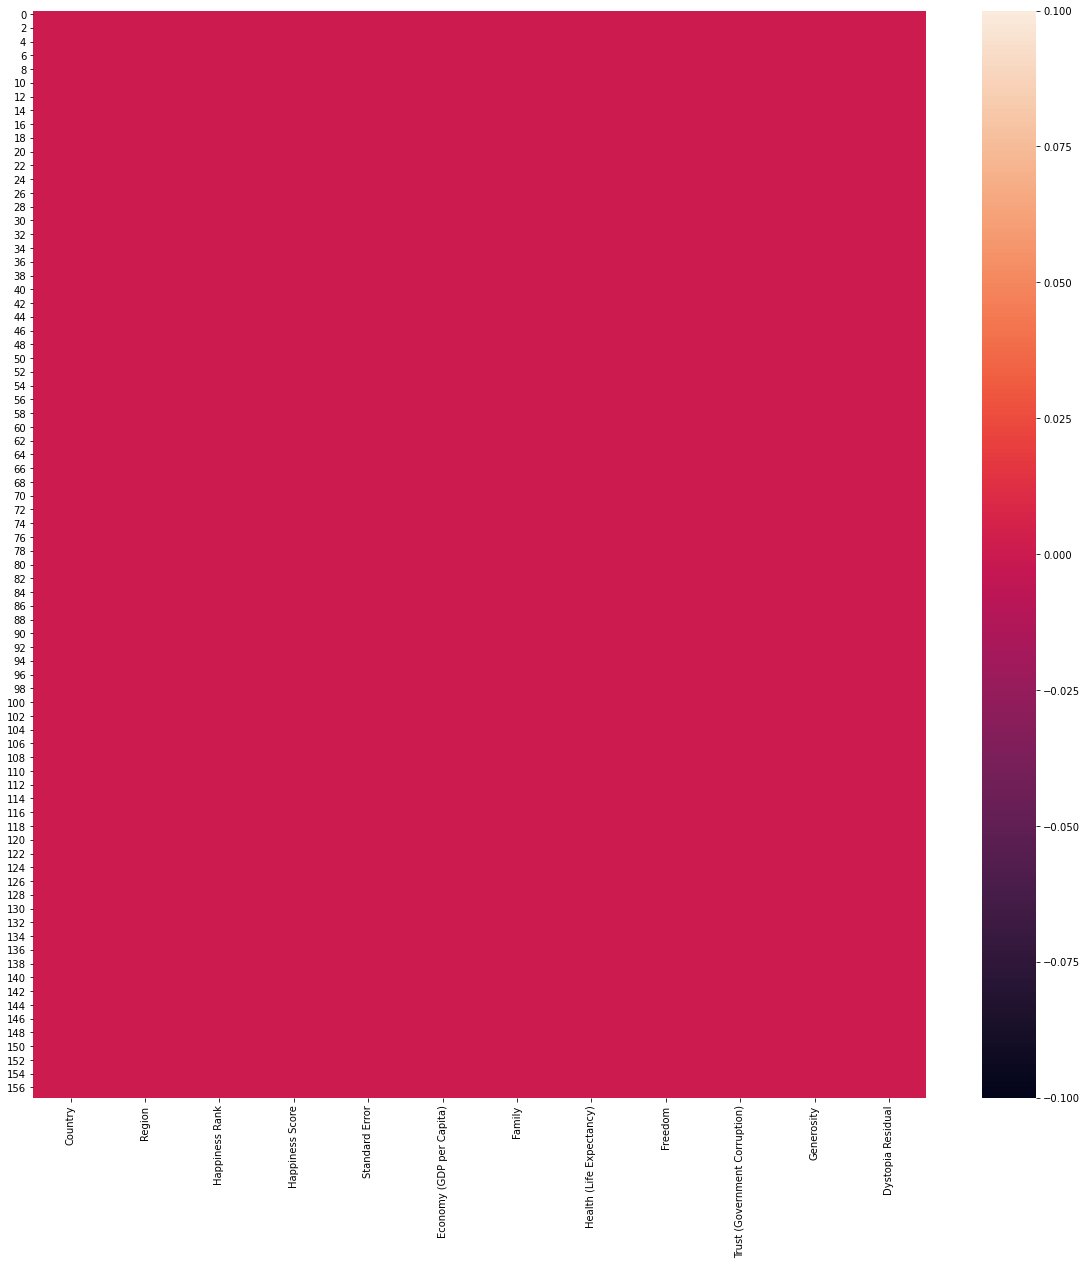

In [43]:
#Displaying null values using heatmap

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

Remarks: No null values found in dataset.

# Label Encoding

In [44]:
#Checking unique values in categorical features

features = df.columns
for x in features:
    if df[x].dtypes == object:
        print(f"%-30s: %5d"%(x,len(df[x].unique())))

Country                       :   158
Region                        :    10


Remarks: Country has 158 unique values which is equal to the total records, therefore, label encoding for it will of no use. Region has 10 unique values, therefore, label encoding is required for it

In [45]:
#Encoding feature Region'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_Region = le.fit_transform(df['Region'])
for i,x in zip(range(len(le.classes_)),le.classes_):
    print("%4d: %s"%(i,x))

   0: Australia and New Zealand
   1: Central and Eastern Europe
   2: Eastern Asia
   3: Latin America and Caribbean
   4: Middle East and Northern Africa
   5: North America
   6: Southeastern Asia
   7: Southern Asia
   8: Sub-Saharan Africa
   9: Western Europe


In [46]:
#Replacing value of feature Region with encoded_Region

df['Region'] = encoded_Region

In [47]:
#Dropping feature Country from dataset as it can not be encoded.

df_new=df.drop(columns=['Country'])
df_new.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

# Statistical Summary

In [48]:
#Statistical Summary of Dataset

df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Remarks: -count for all features are same therefore no null values are present. -mean is almost same as median, so lesser or no skewness is present. -large difference between 75th percentile and max is there in Hppiness Rank, so outlier may be present.

# Exploratory Data Analysis (EDA)

# Univariate Analysis

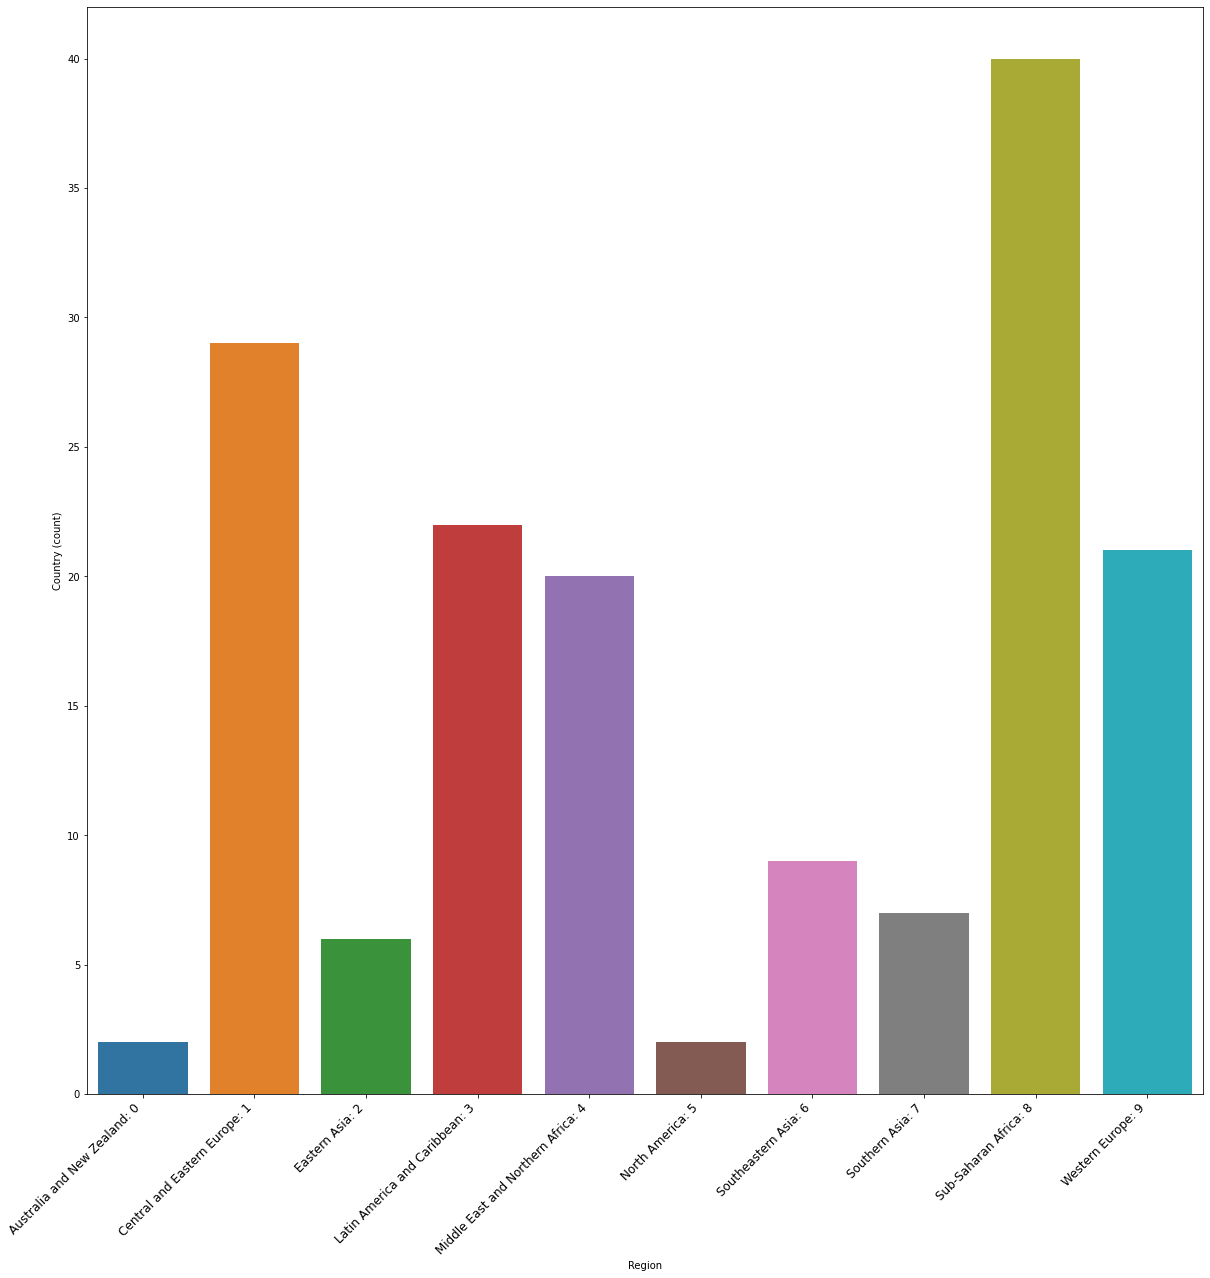

In [49]:
#Checking categorical feature Region with countplot
x_labels = ["%s: %d"%(le.classes_[i],i) for i in range(len(le.classes_))]
sns.countplot(df_new['Region'])
plt.xlabel('Region')
plt.ylabel('Country (count)')
plt.xticks(range(len(le.classes_)),x_labels,rotation=45,horizontalalignment="right",fontsize=12)
plt.show()


Remarks: -Most number of participating country in happiness score is from Region 8. -Least number of participating country in happiness score is from Region 0 and 5.

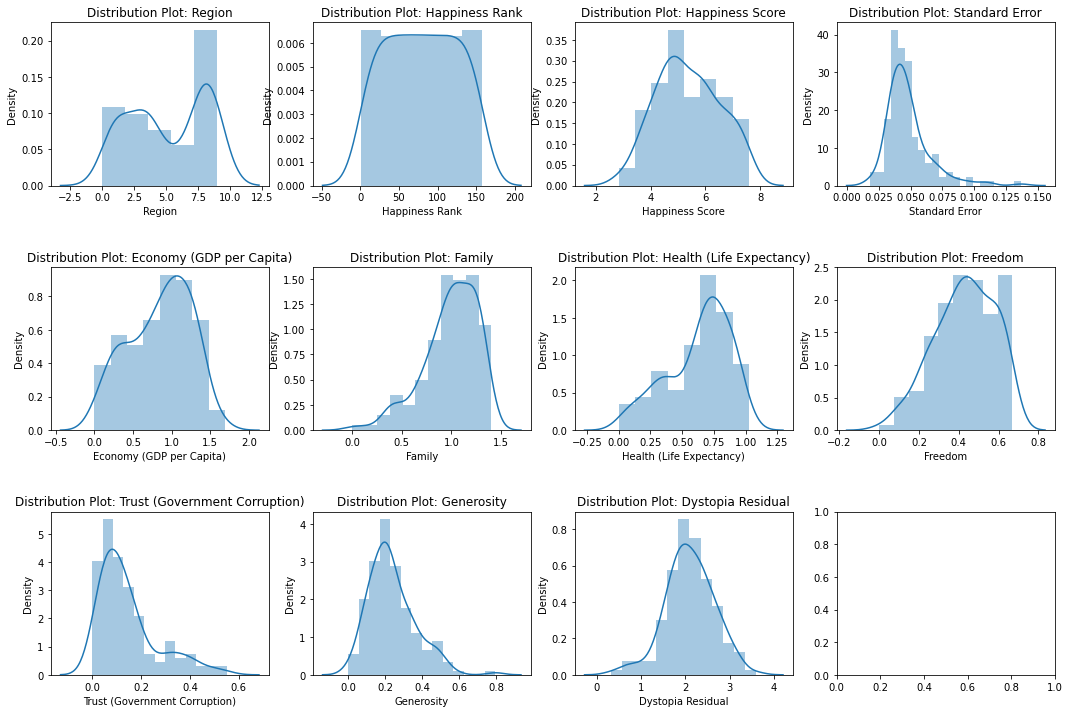

In [50]:
#Checking Data Distribution with the help of distplot.
rows = 3
cols = 4
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols*1.5,rows*cols))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_new[df_new.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df_new.columns[k]}")
        k += 1
        if k == len(df_new.columns):
            break

plt.show()

Remarks: -Data is not distributed normally in any feature. -Data is highly left skewed in Economy (GDP per Capita), Family, Health (Life Expectancy) and Freedom. -Data is highly right skewed in Trust (Government Corruption

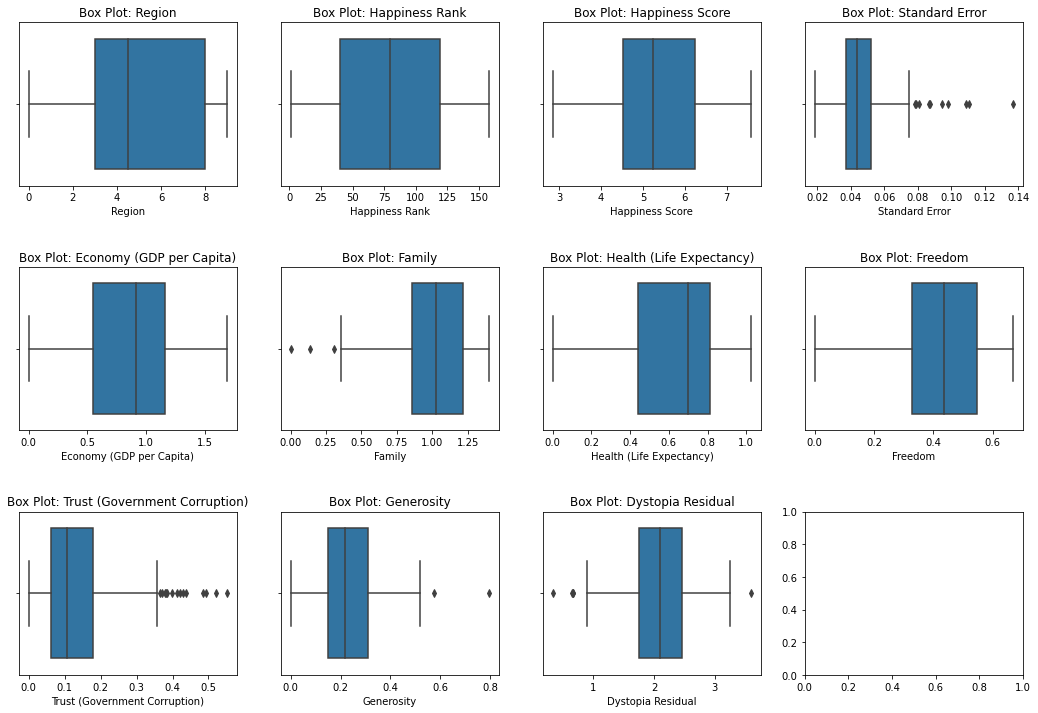

In [51]:
#Checking Data with boxplot
rows = 3
cols = 4
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols*1.5,rows*cols))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(df_new[df_new.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Box Plot: {df_new.columns[k]}")
        k += 1
        if k == len(df_new.columns):
            break

plt.show()

Remarks: -Feature Standar Error, Family, Turst (Government Corruption), Generosity and Dystopia Residual shows presence of outliers.

# Bivariate Analysis

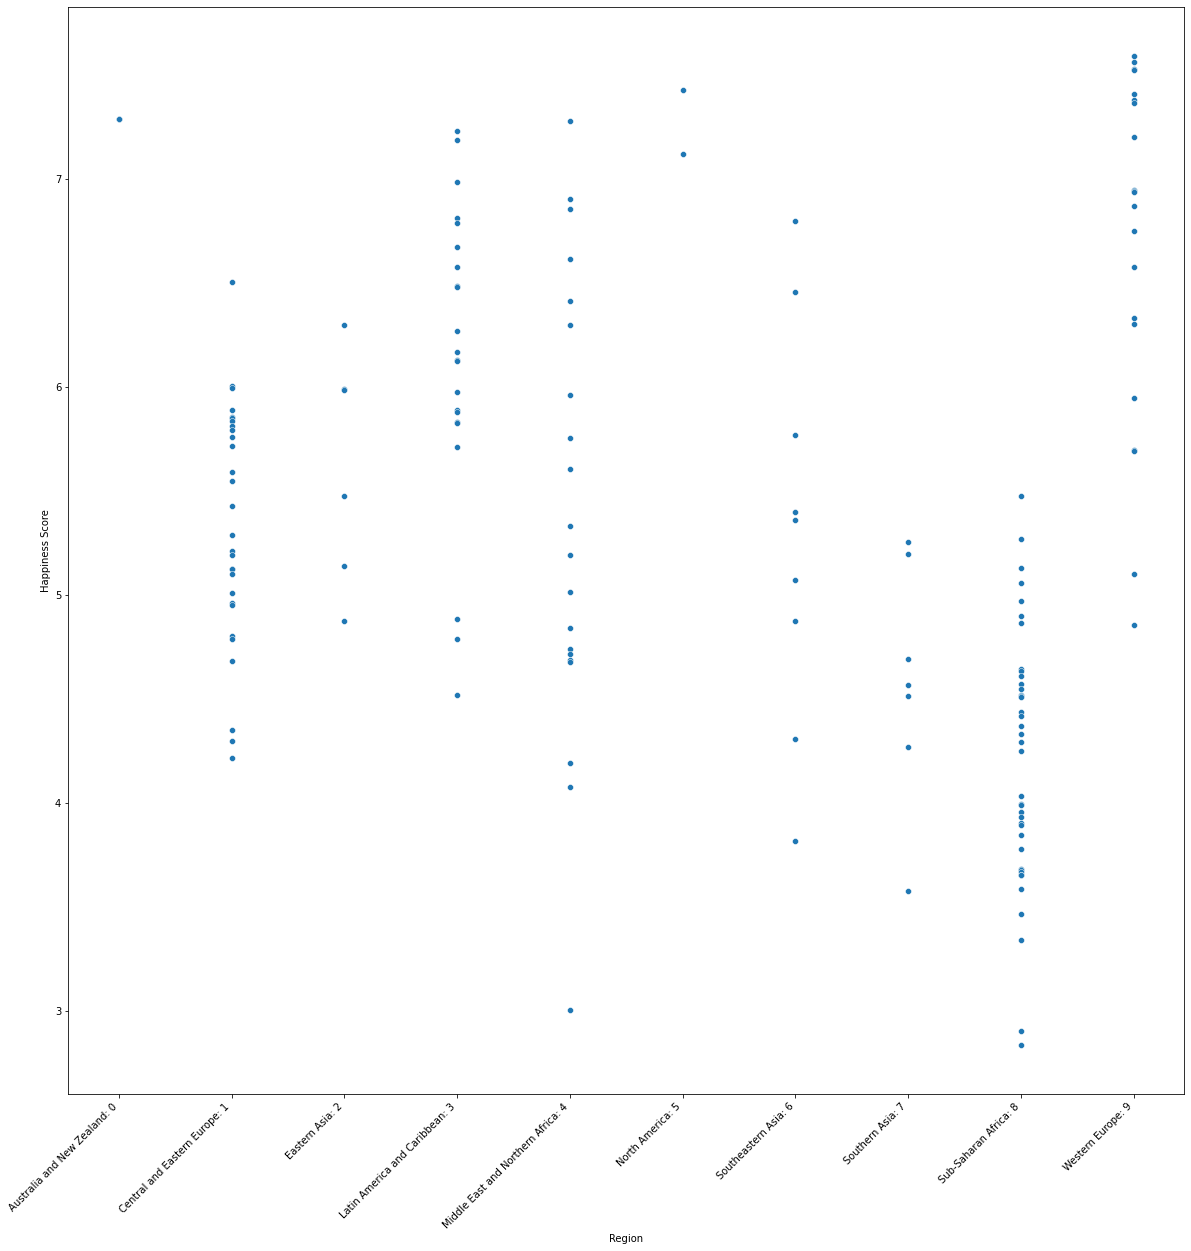

In [52]:
#Checking Relationship between Region and Happiness Score
input_x="Region" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.xticks(range(len(le.classes_)),x_labels,rotation=45,horizontalalignment='right')
plt.show()

Remarks: -Region 0 has >7 Happiness Score. -Region 1, mostly have >4.5 and <6 Happiness Score. -Region 2 is between 4.9 to 6.4 Happiness Score. -Region 3 is mostly between 5.6 to 7.2 Happiness Score. -Region 4 is mostly between 4.5 to 6.7 Happiness Score. -Region 5 has >=7 Happiness Score. -Region 6 has >3.5 and <7 Happiness Score. -Region 7 has >3.5 and <5.5 Happiness Score. -Region 8 is mostly between 3.4 to 5.4 Happiness Score. -Region 9 is mostly between 6 to 7.5 Happiness Score.


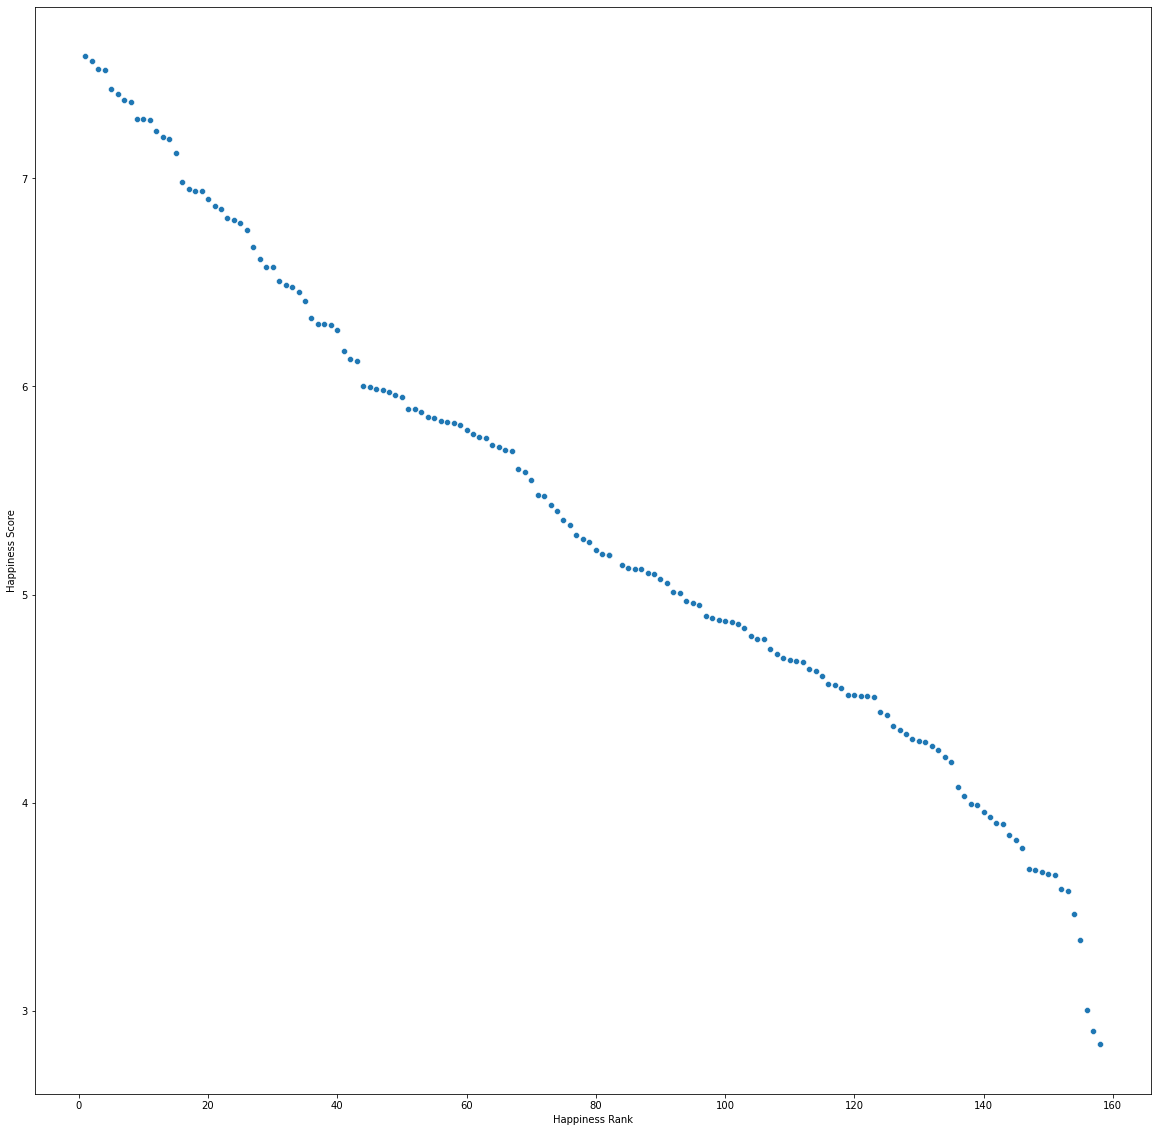

In [53]:
#Checking Relationship between Happiness Rank and Happiness Score
input_x="Happiness Rank" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()


Remarks: -Happiness Rank is inversely proportional to Happiness Score, i.e., as Happiness Rank increases, Happiness Score decreases.

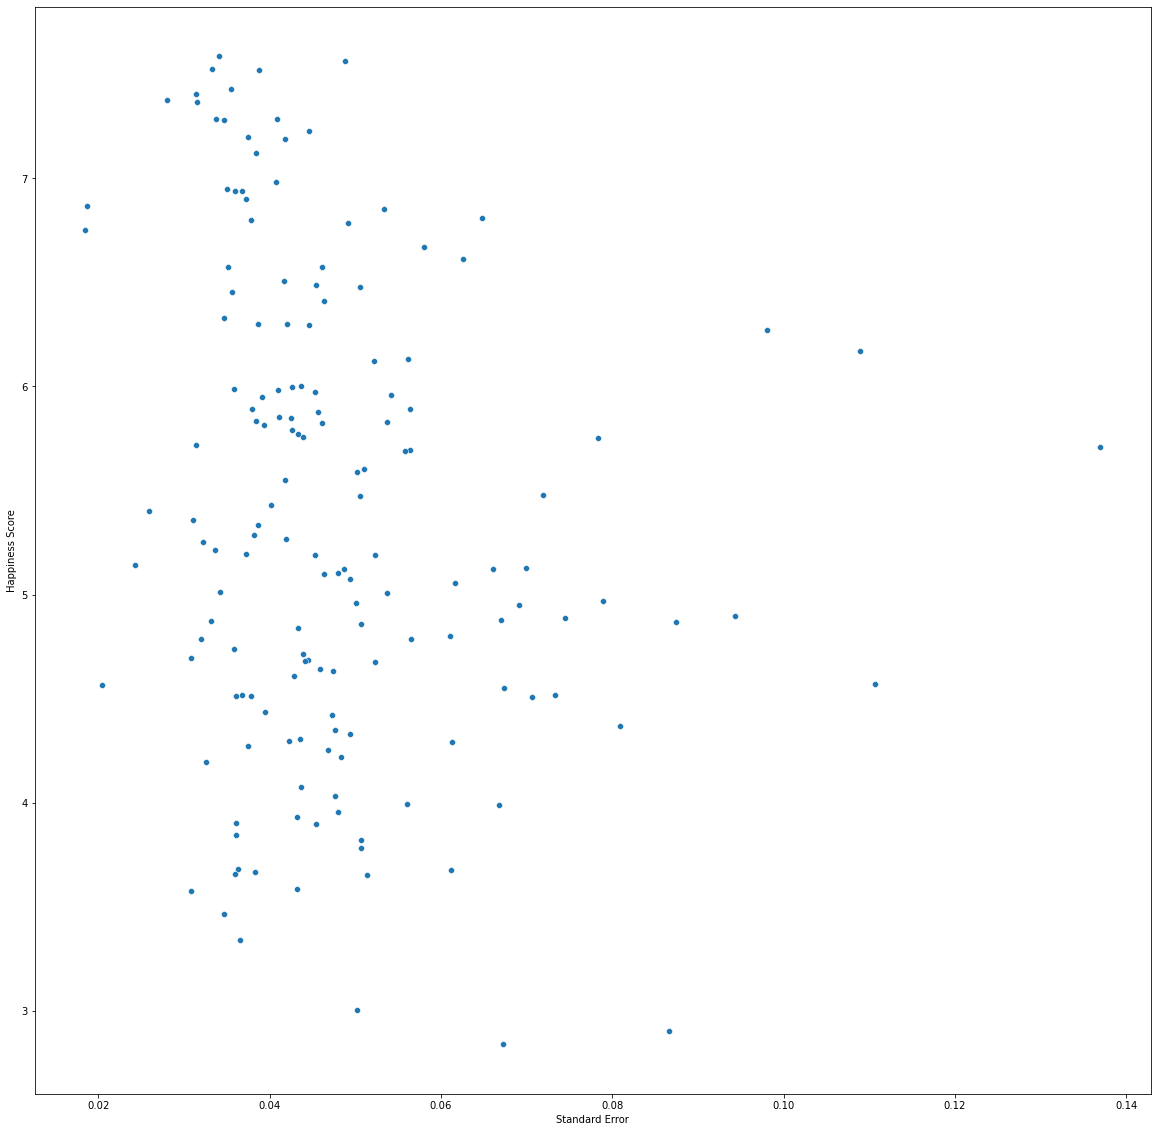

In [54]:
#Checking Relationship between Standard Error and Happiness Score
input_x="Standard Error" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

Remarks: -Happiness Score is dense when Standard Error is between 0.03 to 0.06

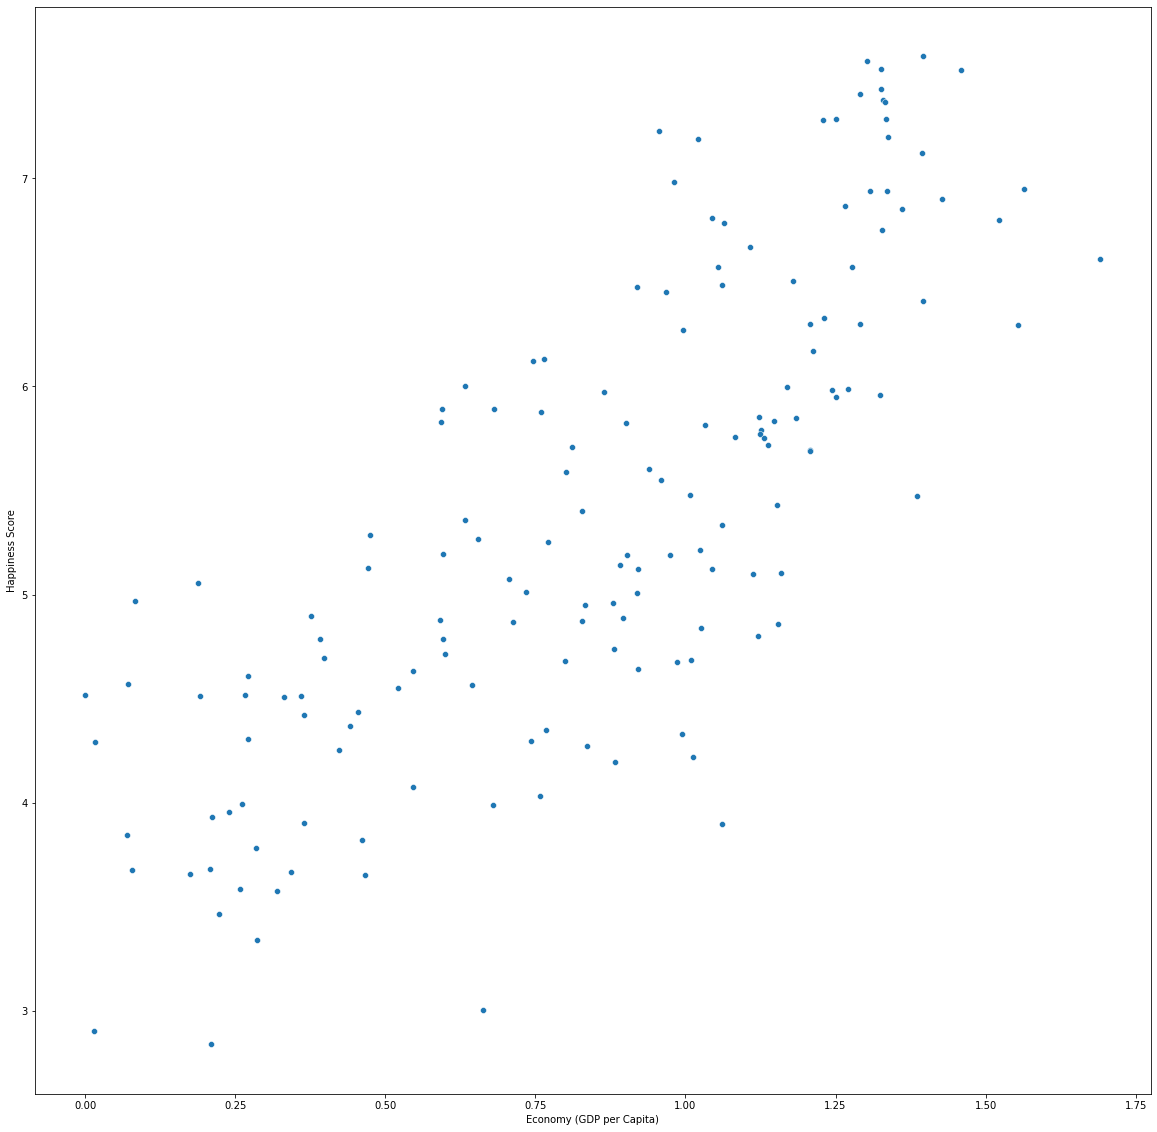

In [56]:
#Checking Relationship between Economy (GDP per Capita) and Happiness Score
input_x="Economy (GDP per Capita)" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

Remarks: -Economy (GDP per Capita) is directly proportional to Happiness Score, i.e., as Economy (GDP per Capita) increases, Happiness Score increases.

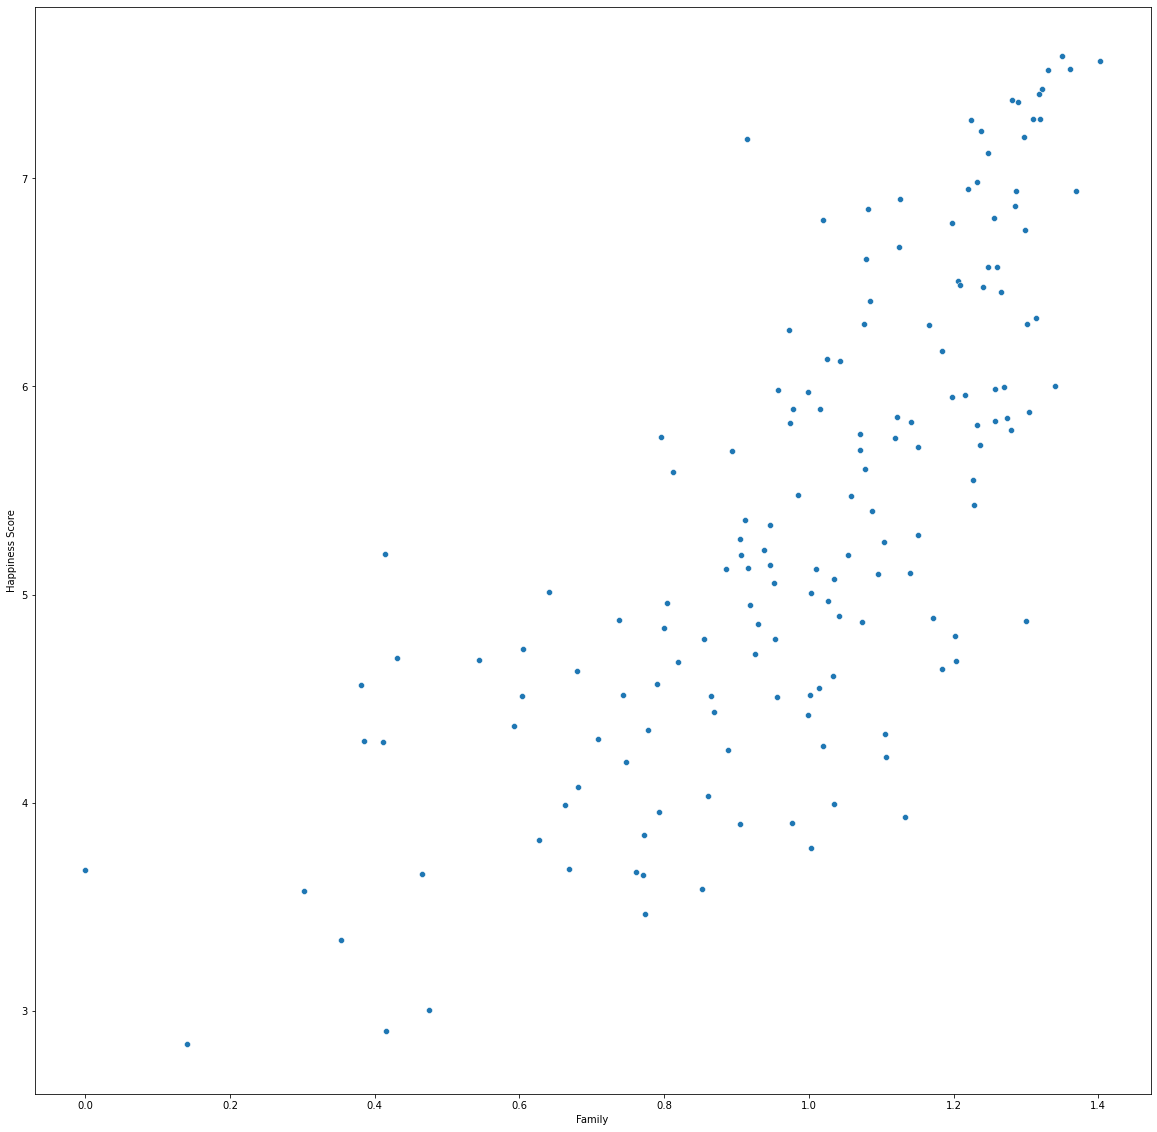

In [57]:
#Checking Relationship between Family and Happiness Score
input_x="Family" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

Remarks: -Happiness Score is increasing as the Family increases.

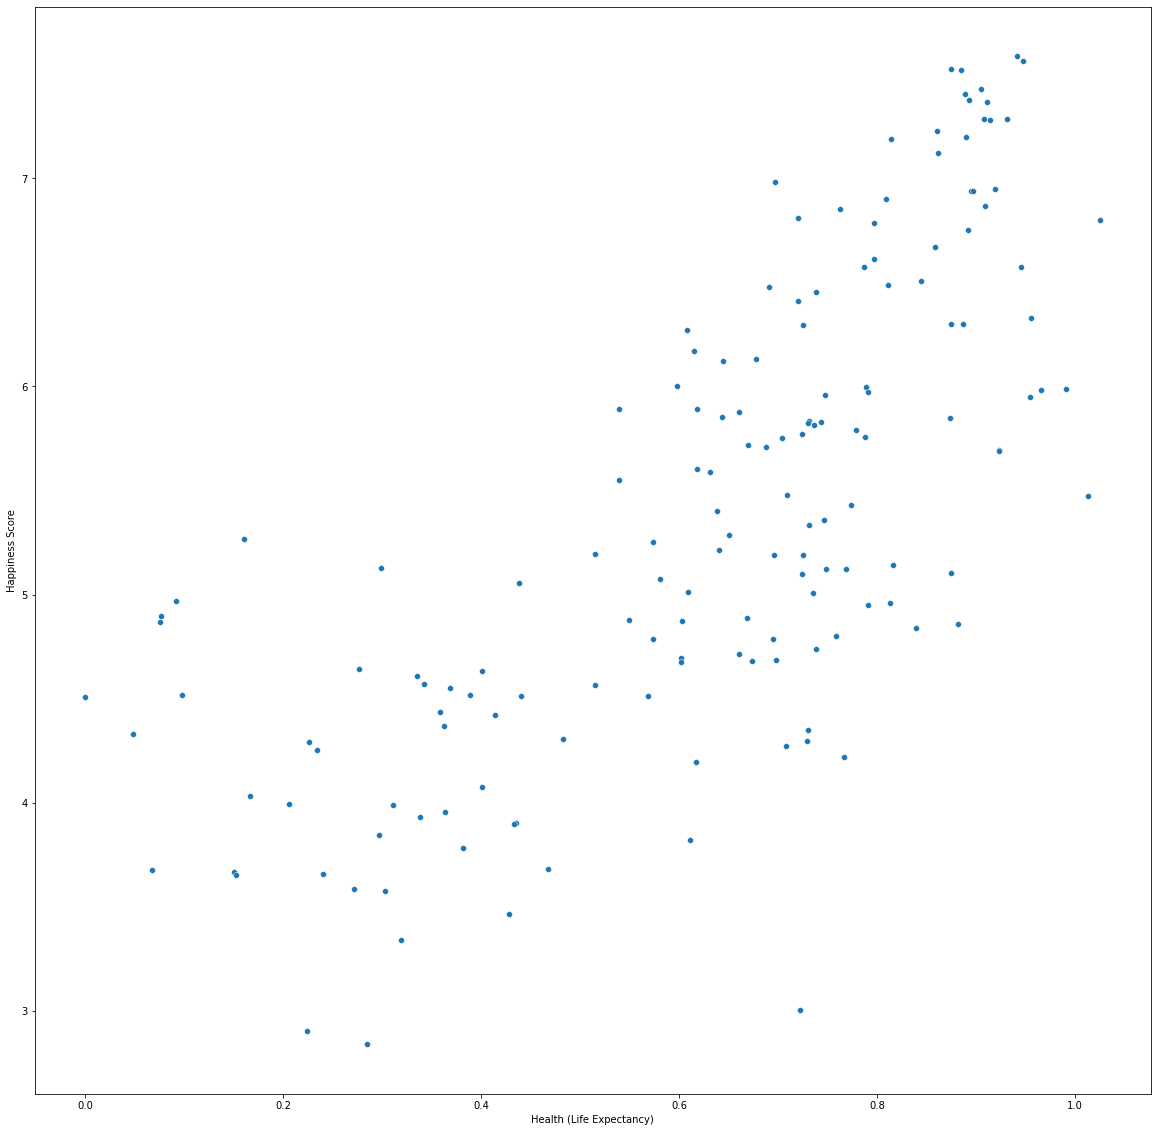

In [58]:
#Checking Relationship between Health (Life Expectancy) and Happiness Score
input_x="Health (Life Expectancy)" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

Remarks: -With the increase in Health (Life Expectancy), Happiness Score also increases.

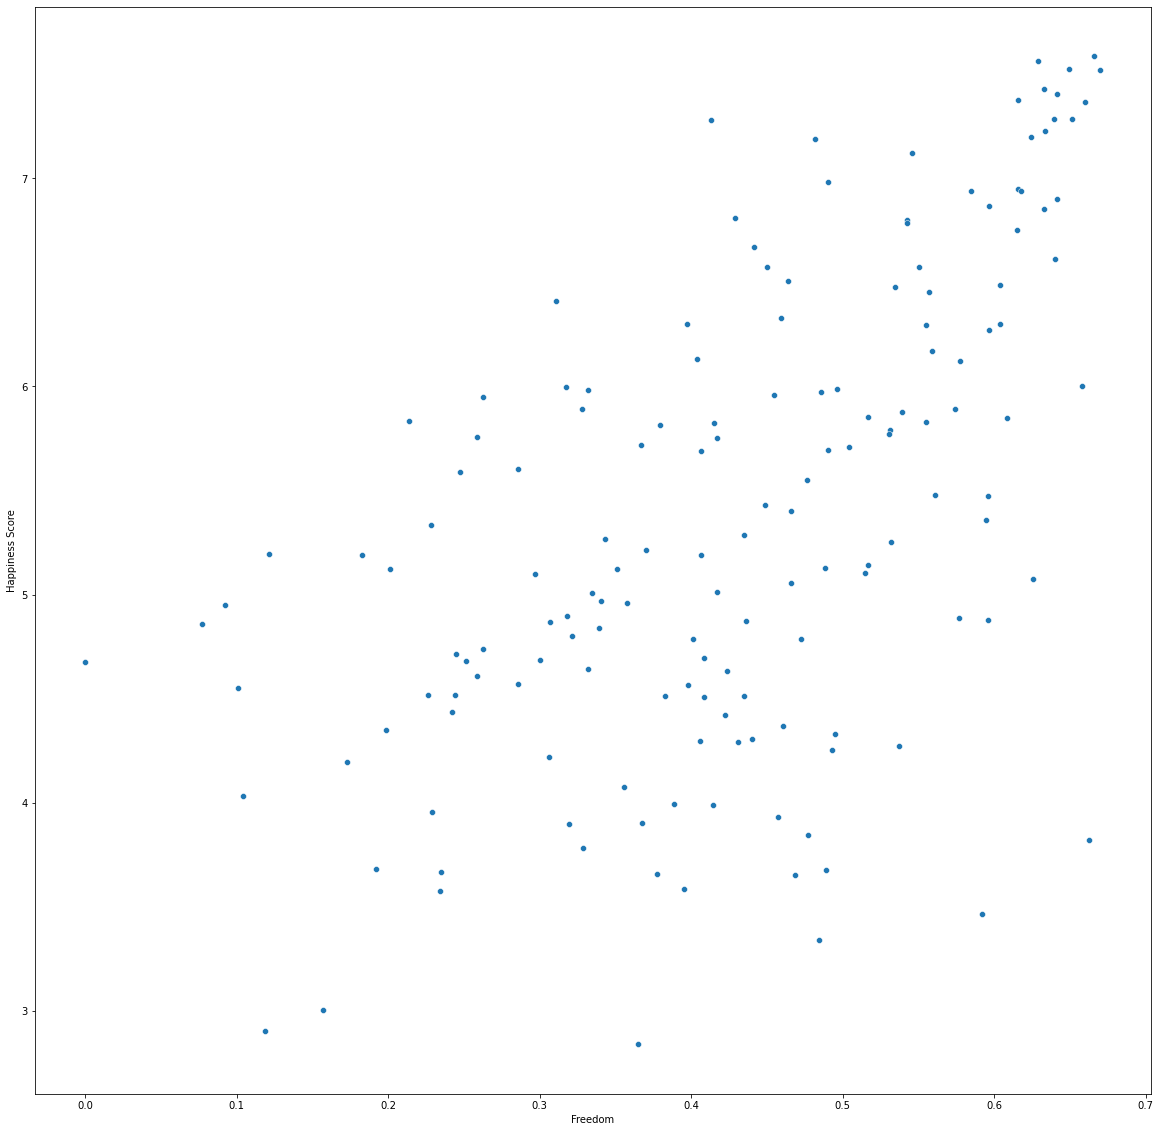

In [59]:
#Checking Relationship between Freedom and Happiness Score
input_x="Freedom" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

Remarks: -With increase in Freedom, Happiness Score also increases. -Most of the Happiness Score lies between 0.3 to 0.65 of Freedom.

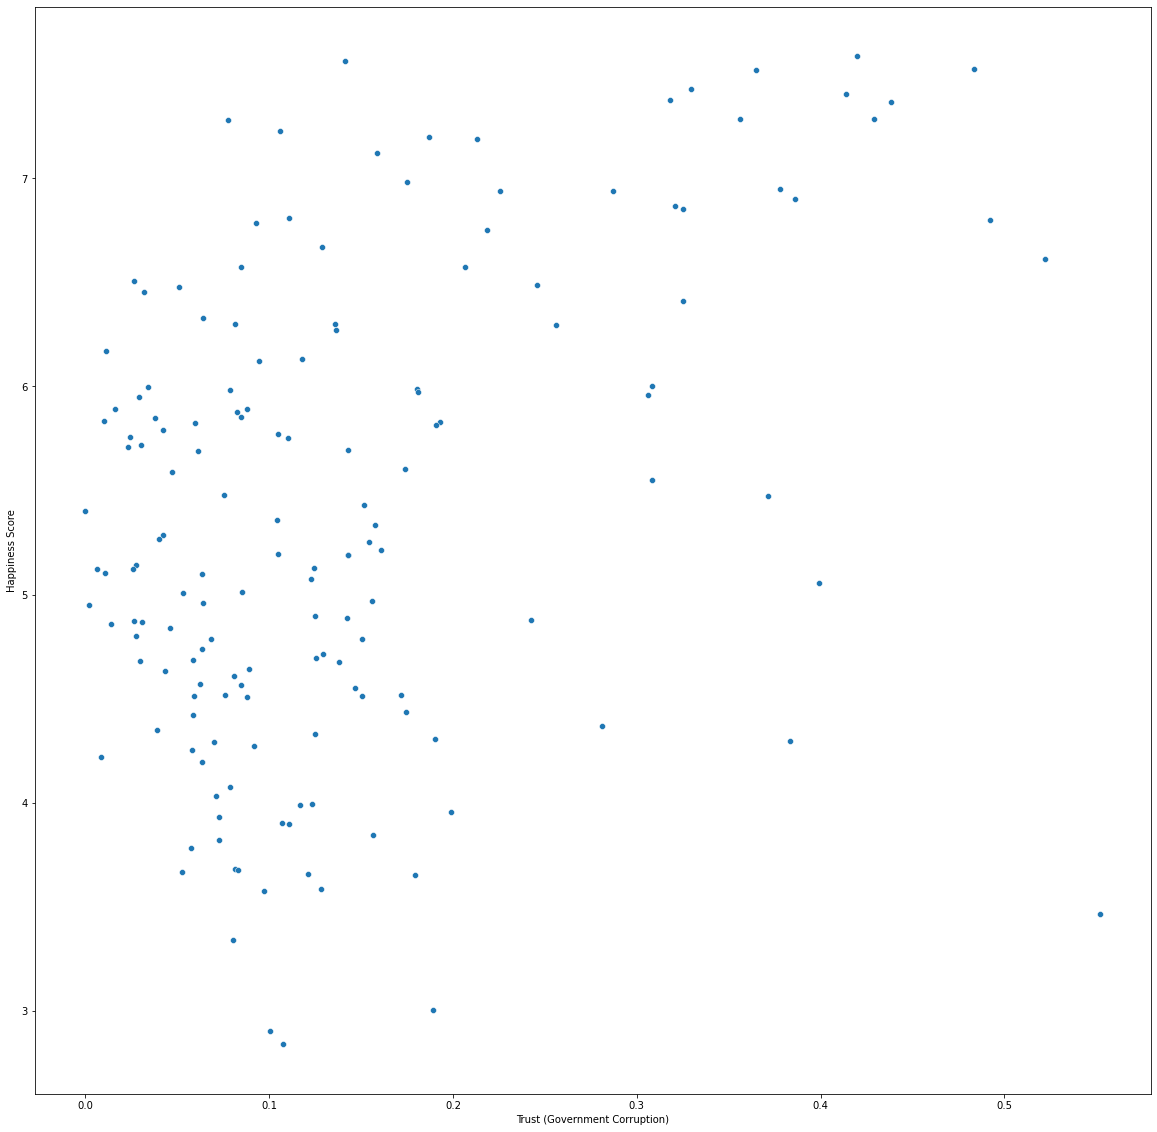

In [60]:
#Checking Relationship between Trust (Governmnet Corruption) and Happiness Score
input_x="Trust (Government Corruption)" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

Remarks: -With the increase in Trust (Governmnet Corruption), Happiness Score decreases. -Most of the Happpiness Score lies between 0.0 to 0.2 of Trust (Government Corruption).

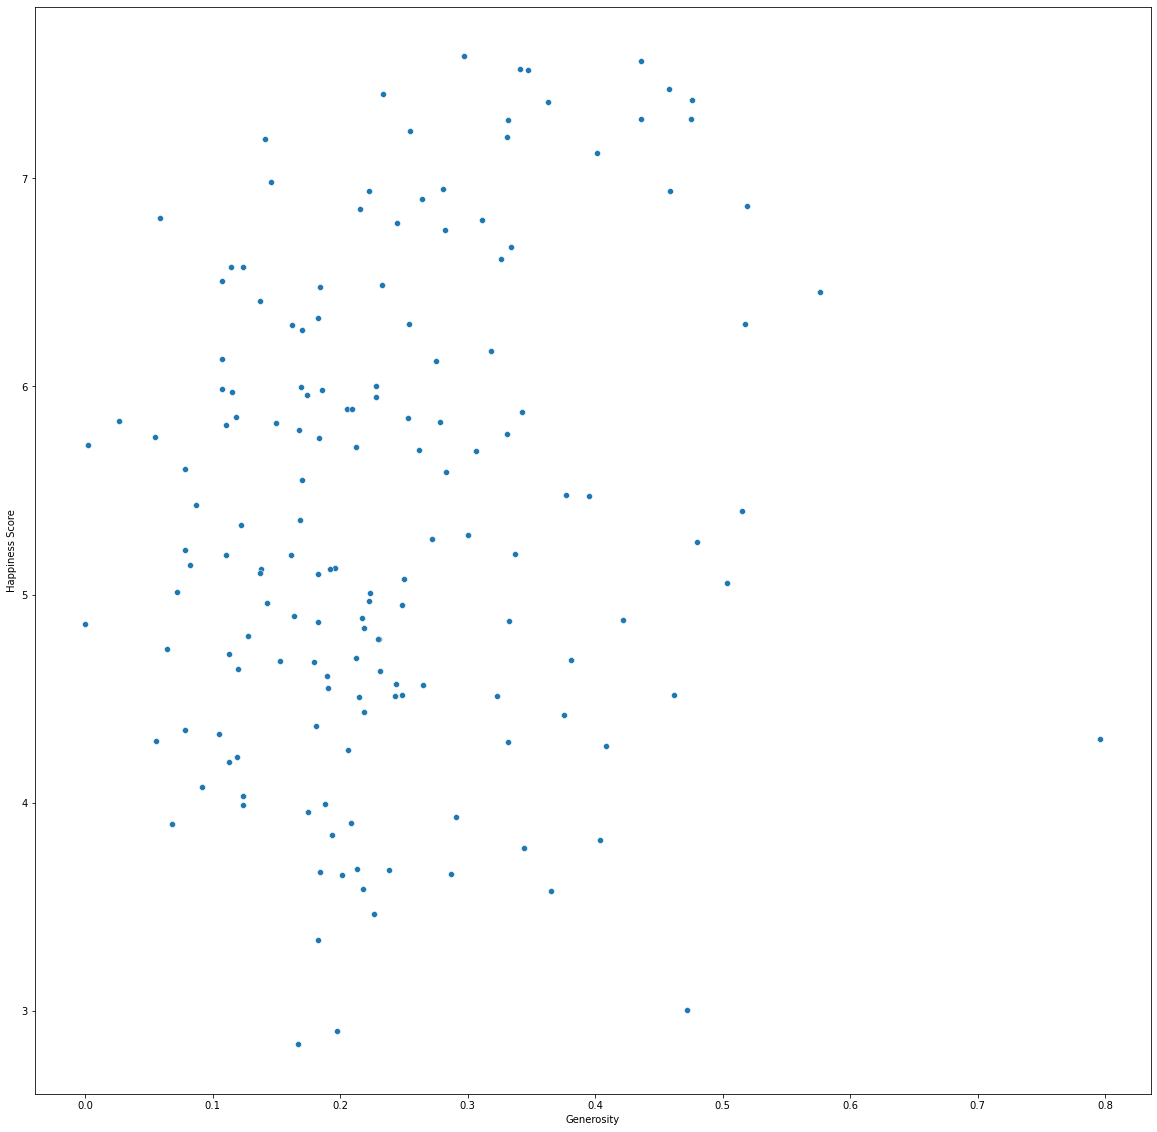

In [61]:
#Checking Relationship between Generosity and Happiness Score
input_x="Generosity" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()


Remarks: -Density of Happiness Score decreases as the Generosity increases.

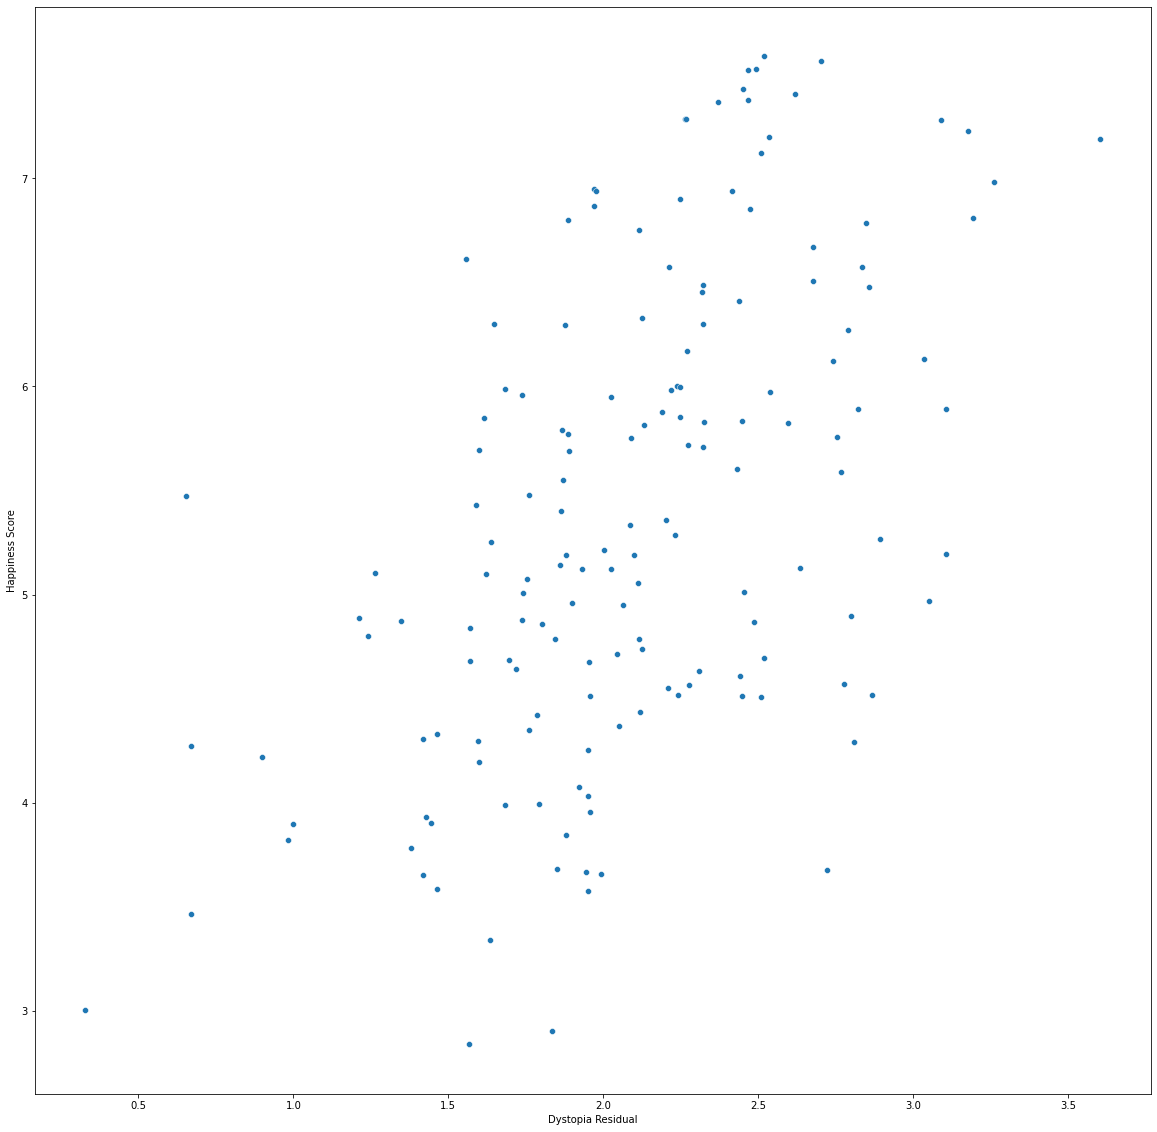

In [62]:
#Checking Relationship between Dystopia Residual and Happiness Score
input_x="Dystopia Residual" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

Remarks: -With the increase in Dystopia Residual, Happiness Score increases

# Multi-Variate Analysis

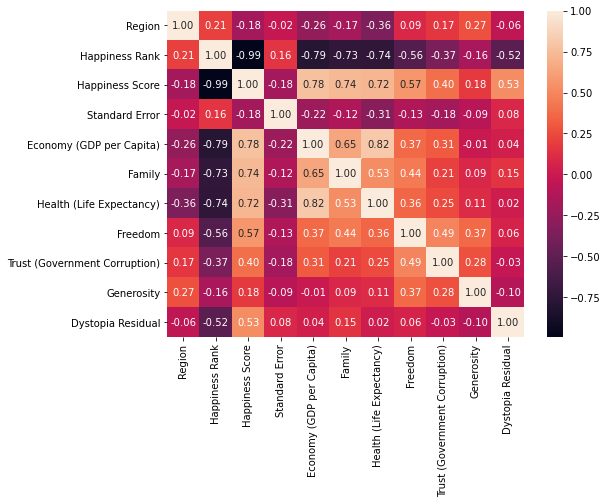

In [63]:
#Checking Correlation of Features
df_corr = df_new.corr()

#Showing Correlation with the help of heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.show()

Remarks: -Happiness Rank is negatively high correlated to Happiness Score. -Positively high correlated to Happiness Score are: -Economy (GDP per Capita) -Family -Health (Life Expectancy) -Freedom -Dystopia Residual -Trust (Government Corruption) -Moderately correlated features are: -Generosity -Standard Error -Region

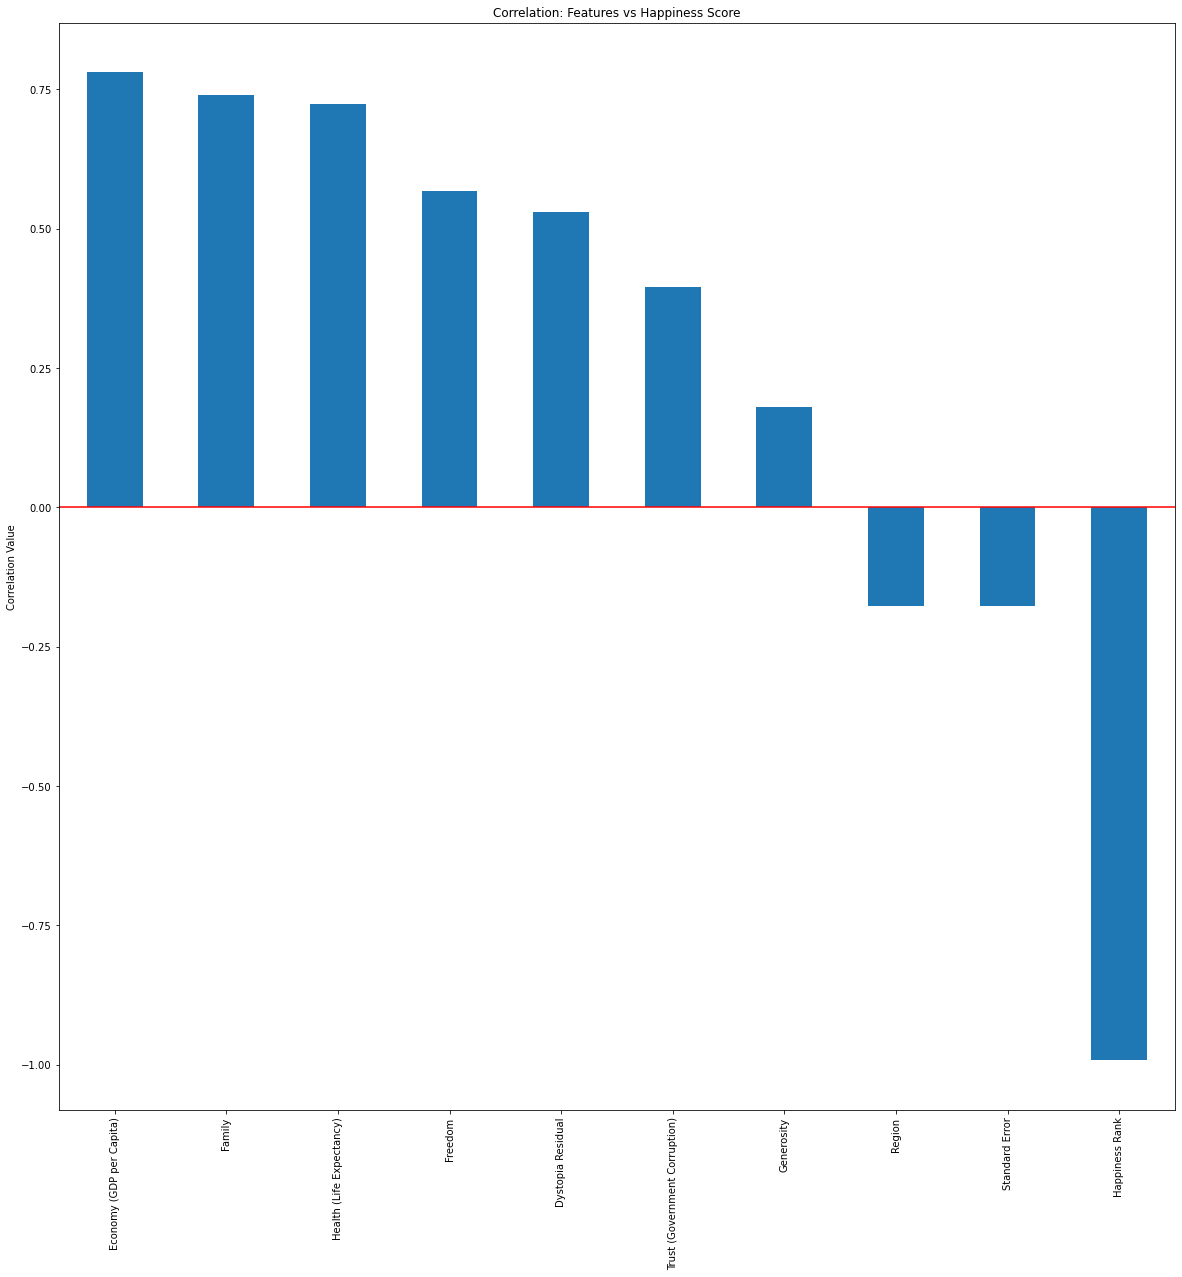

In [64]:
#Showing Correlation of Features with Happiness Score using bar plot
df_corr['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot.bar()
plt.plot([-1,10],[0,0],color='r')
plt.ylabel('Correlation Value')
plt.title('Correlation: Features vs Happiness Score')
plt.show()

Remarks: -Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Dystopia Residual are highly correlated. -Happiness Rank is negatively high correlated.

# Skewness

In [65]:
#Checking skewness

df_new.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Remarks: -Data skewness is present in: -Standard Error -Family -Trust (Government Corruption) -Generosity and needs to be treated accordingly.

# Outlier Removal

In [66]:
#Checking outlier with zscore
from scipy.stats import zscore
import numpy as np

z = np.abs(zscore(df_new))
np.where(z>3) #Printing location of outliers

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))

In [67]:
#Removing outliers
df_wo = df_new[(z<=3).all(axis=1)]
print(f"Original Shape: {df_new.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df_new)-len(df_wo))*100/len(df_new)}%")

Original Shape: (158, 11)
New Shape: (149, 11)
% Loss: 5.69620253164557%


Remarks: -Since data loss is between 5 to 6 percent, proceeding with dataset without outliers.

# Preparing Data for Model

In [68]:
#Seperating Input and Output variables.
X = df_wo.drop(columns=['Happiness Score'])
Y = df_wo['Happiness Score']
print(X.shape)
print(Y.shape)

(149, 10)
(149,)


In [96]:
#Treating skewness
from sklearn.preprocessing import power_transform
X_t = power_transform(X)

In [97]:
#Scaling Data for model using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(X_t)

# Finding Best Model

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Defining function for best random state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_r2Score = 0
    for i in range(r):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        temp_r2Score = r2_score(y_test,predict_y)
        if temp_r2Score>best_r2Score:
            best_r2Score = temp_r2Score
            best_rState = i
            
    return best_rState, best_r2Score

#Defining function for best cv
def get_best_cv(model,parameters,x_train,y_train):
    best_cv = 0
    best_cvScore = 0
    for i in range(2,20):
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
            
    return best_cv, best_cvScore

# 1. LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression
#Finding best rand_state for train test split
best_rState, best_r2Score = get_best_rstate(400,LinearRegression(),scaled_x,Y)
print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 373 with best r2_score: 0.9985859768986914


In [74]:
#Splitting train test with random_state = 373
lr_x_train,lr_x_test,lr_y_train,lr_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=373)

In [75]:
#Hypertuning parameters
parameters = {
    "fit_intercept": [True,False],
    "normalize": [True,False],
}

#Finding best CV
best_cv, lr_best_cvScore = get_best_cv(LinearRegression(),parameters,lr_x_train,lr_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {lr_best_cvScore}")

Best CV: 10 with best cross_val_score: 0.9921418926499337


In [76]:
#Building Final Model with hpypertuned parameters and cv = 10
lr_gscv = GridSearchCV(LinearRegression(),parameters,cv=10)
lr_gscv.fit(lr_x_train,lr_y_train)
print(lr_gscv.best_params_)

{'fit_intercept': True, 'normalize': True}


In [77]:
#Building Final Model with hpypertuned parameters and cv = 10
lr_gscv = GridSearchCV(LinearRegression(),parameters,cv=10)
lr_gscv.fit(lr_x_train,lr_y_train)
print(lr_gscv.best_params_)

{'fit_intercept': True, 'normalize': True}


In [78]:
#Checking Final Performance of Model
lr_predict_y = lr_gscv.best_estimator_.predict(lr_x_test)

lr_r2Score = r2_score(lr_y_test,lr_predict_y)
lr_mse = mean_squared_error(lr_y_test,lr_predict_y)
lr_mae = mean_absolute_error(lr_y_test,lr_predict_y)

print(f"R2_SCORE: {round(lr_r2Score*100,2)}%\t MSE: {lr_mse}\t RMSE: {np.sqrt(lr_mse)}\t MAE: {lr_mae}")

R2_SCORE: 99.86%	 MSE: 0.001872235388540515	 RMSE: 0.043269335429845866	 MAE: 0.03794318251219214


# 2. Lasso

In [79]:
from sklearn.linear_model import Lasso
#Finding the best random state for train test split
best_rState, best_r2Score = get_best_rstate(400,Lasso(),scaled_x,Y)

print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 321 with best r2_score: 0.3423975593833096


In [82]:
#Splitting train test data with random_state = 321
la_x_train,la_x_test,la_y_train,la_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=321)

In [83]:
import warnings
warnings.simplefilter('ignore')
#Hypertuning parameters
parameters = {
    "alpha": [0.0001,0.001,0.01,0.1,1.0],
    "fit_intercept": [True,False],
    "normalize": [True,False],
    "tol": [1e-6,1e-5,1e-4],
    "selection": ['cyclic','random'],
}
#Finding best CV
best_cv,la_best_cvScore = get_best_cv(Lasso(),parameters,la_x_train,la_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {la_best_cvScore}")

Best CV: 12 with best cross_val_score: 0.994969984522193


In [84]:
#Building final model with hypertuned parameters with cv=12
la_gscv = GridSearchCV(Lasso(),parameters,cv=12)
la_gscv.fit(la_x_train,la_y_train)

print(la_gscv.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'selection': 'random', 'tol': 0.0001}


In [85]:
#Checking Final Performanace of the model
la_predict_y = la_gscv.predict(la_x_test)

la_r2Score = r2_score(la_y_test,la_predict_y)
la_mse = mean_squared_error(la_y_test,la_predict_y)
la_mae = mean_absolute_error(la_y_test,la_predict_y)

print(f"R2_SCORE: {round(la_r2Score*100,2)}%\t MSE: {la_mse}\t RMSE: {np.sqrt(la_mse)}\t MAE: {la_mae}")

R2_SCORE: 99.48%	 MSE: 0.004156555294304204	 RMSE: 0.0644713525087244	 MAE: 0.046058030740524177


# 3. Ridge

In [86]:
from sklearn.linear_model import Ridge
#Finding the best random state for train test split
best_rState, best_r2Score = get_best_rstate(400,Ridge(),scaled_x,Y)

print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 373 with best r2_score: 0.9984840924192643


In [87]:
#Splitting train test data with random_state = 373
ri_x_train,ri_x_test,ri_y_train,ri_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=373)

In [88]:
#Hypertuning parameters
parameters = {
    "alpha": [0.0001,0.001,0.01,0.1,1.0],
    "fit_intercept": [True,False],
    "normalize": [True,False],
    "tol": [1e-6,1e-5,1e-4],
    "solver": ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
}
#Finding best CV
best_cv,ri_best_cvScore = get_best_cv(Ridge(),parameters,ri_x_train,ri_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {ri_best_cvScore}")

Best CV: 10 with best cross_val_score: 0.9927237288328143


In [89]:
#Building final model with hypertuned parameters with cv=10
ri_gscv = GridSearchCV(Ridge(),parameters,cv=10)
ri_gscv.fit(ri_x_train,ri_y_train)

print(ri_gscv.best_params_)

{'alpha': 1.0, 'fit_intercept': True, 'normalize': False, 'solver': 'saga', 'tol': 0.0001}


In [90]:
#Checking Final Performanace of the model
ri_predict_y = ri_gscv.predict(ri_x_test)

ri_r2Score = r2_score(ri_y_test,ri_predict_y)
ri_mse = mean_squared_error(ri_y_test,ri_predict_y)
ri_mae = mean_absolute_error(ri_y_test,ri_predict_y)

print(f"R2_SCORE: {round(ri_r2Score*100,2)}%\t MSE: {ri_mse}\t RMSE: {np.sqrt(ri_mse)}\t MAE: {ri_mae}")

R2_SCORE: 99.85%	 MSE: 0.0020072433470489045	 RMSE: 0.04480226944083195	 MAE: 0.038525383713822775


# 4. SGDRegressor

In [91]:
from sklearn.linear_model import SGDRegressor
#Finding the best random state for train test split
best_rState, best_r2Score = get_best_rstate(400,SGDRegressor(),scaled_x,Y)

print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 344 with best r2_score: 0.9967772002750092


In [99]:
#Splitting train test data with random_state = 266
sg_x_train,sg_x_test,sg_y_train,sg_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=266)

In [100]:
#Hypertuning parameters
parameters = {
    "loss": ['huber','squared_loss','epsilon_insensitive','squared_epsilon_insensitive'],
    "penalty": ['l2','l1','elasticnet'],
    "alpha": [0.00001,0.0001,0.001,0.01],
    "fit_intercept": [True,False],
    "shuffle": [True,False],
    "tol": [1e-6,1e-5,1e-4],
    "learning_rate": ['constant','optimal','invscaling','adaptive'],
}
#Finding best CV
best_cv,sg_best_cvScore = get_best_cv(SGDRegressor(),parameters,sg_x_train,sg_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {sg_best_cvScore}")

Best CV: 5 with best cross_val_score: 0.9935099468111867


In [101]:
#Building final model with hypertuned parameters with cv=5
sg_gscv = GridSearchCV(SGDRegressor(),parameters,cv=5)
sg_gscv.fit(sg_x_train,sg_y_train)

print(sg_gscv.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'learning_rate': 'constant', 'loss': 'huber', 'penalty': 'elasticnet', 'shuffle': True, 'tol': 1e-06}


In [102]:
#Checking Final Performanace of the model
sg_predict_y = sg_gscv.predict(sg_x_test)

sg_r2Score = r2_score(sg_y_test,sg_predict_y)
sg_mse = mean_squared_error(sg_y_test,sg_predict_y)
sg_mae = mean_absolute_error(sg_y_test,sg_predict_y)

print(f"R2_SCORE: {round(sg_r2Score*100,2)}%\t MSE: {sg_mse}\t RMSE: {np.sqrt(sg_mse)}\t MAE: {sg_mae}")

R2_SCORE: 99.83%	 MSE: 0.0025149165936819116	 RMSE: 0.05014894409338956	 MAE: 0.0399880205729628


# Best Model Selection

In [103]:
#Comparing models

model_name = ['LinearRegression','Lasso','Ridge','SGDRegressor']
r2Score = [lr_r2Score,la_r2Score,ri_r2Score,sg_r2Score]
mse = [lr_mse,la_mse,ri_mse,sg_mse]
mae = [lr_mae,la_mae,ri_mae,sg_mae]
cvs = [lr_best_cvScore,la_best_cvScore,ri_best_cvScore,sg_best_cvScore]

models = pd.DataFrame({
    "name":model_name,
    "r2_score":r2Score,
    "mean_squared_error":mse,
    "mean_absolute_error":mae,
    "cross_val_score":cvs
})
models["r2_score - cross_val_score"]=models["r2_score"]-models["cross_val_score"]
models

,name,r2_score,mean_squared_error,mean_absolute_error,cross_val_score,r2_score - cross_val_score
0,LinearRegression,0.998586,0.001872,0.037943,0.992142,0.006444
1,Lasso,0.994782,0.004157,0.046058,0.994970,-0.000188
2,Ridge,0.998484,0.002007,0.038525,0.992724,0.005760
3,SGDRegressor,0.998317,0.002515,0.039988,0.993510,0.004807


Remarks: r2_score is almost same in all models. In case of Lasso model, difference between r2_score and corss_val_score is very less as compared to other models, therefore, proceeding with Lasso Model

# Saving Model or Serialization

In [104]:
import joblib
filename = "world_happiness_project.pkl"
joblib.dump(la_gscv.best_estimator_,open(filename,'wb'))

# Conclusion

In [106]:
conc = pd.DataFrame({"Original":np.array(la_y_test),"Predicted":np.array(la_predict_y)})
conc

,Original,Predicted
0,5.948,6.001643
1,4.419,4.301272
2,4.677,4.653590
3,5.589,5.559656
4,6.810,6.783944
5,5.878,5.902965
6,4.550,4.459940
7,5.984,6.098515
8,4.874,4.876613
9,6.302,6.330977


In [ ]:
Remarks: Lasso Model is performing with 99.48% of Accuracy.